<a href="https://colab.research.google.com/github/unni2888/CognoRise-Infotech/blob/main/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# To make the plots appear automatically without using plt.show
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Flatten


np.random.seed(0)

In [ ]:
#from keras.datasets import mnist
#(X_train, y_train) = mnist.load_data()

In [ ]:
df = pd.read_csv('train[1].csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [ ]:
df[df.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [ ]:
df['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [ ]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

#Creating X and y

In [ ]:
X = df.iloc[:,1:]
y = df['label']

# Splitting into Train and Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((28140, 784), (28140,), (13860, 784), (13860,))

# Visualizations

In [ ]:
array = np.array(X)

In [ ]:
array.shape

(42000, 784)

In [ ]:
array[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 188, 255,  94,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 191, 250, 253,  93,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
array[0][133]

255

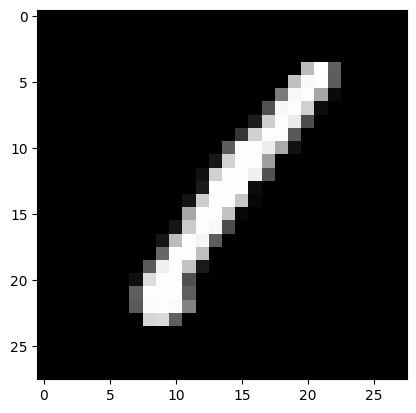

In [ ]:
plt.imshow(array[0].reshape(28,28), cmap = 'gray')

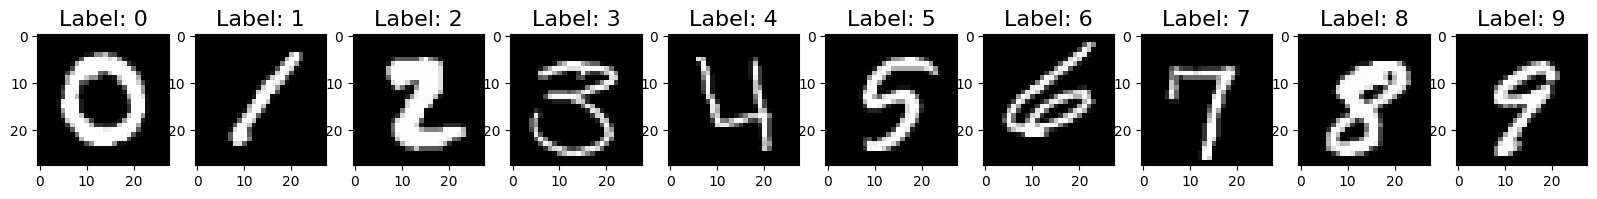

In [ ]:
fig, ax = plt.subplots(1, 10, figsize = (20,20))

for i in range(0,10):
  sample = array[df['label'] == i][0]
  ax[i].imshow(sample.reshape(28,28), cmap = 'gray')
  ax[i].set_title("Label: {}".format(i), fontsize = 16)

# Converting y into categorical

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape, y_train.shape

((28140, 784), (28140, 10))

# Normalizing the training set

In [ ]:
X_train = MinMaxScaler().fit_transform(X_train)

In [ ]:
X_train.shape,y_train.shape

((28140, 784), (28140, 10))

# Creating ANN Model

In [ ]:
# define the keras model
model = Sequential()
model.add(Dense(units = 128, input_shape=(784,), activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units =10, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the ANN Model

In [ ]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=10, batch_size=512)

Epoch 1/10
55/55 [==============================] - 2s 11ms/step - loss: 0.8941 - accuracy: 0.7417
Epoch 2/10
55/55 [==============================] - 1s 11ms/step - loss: 0.3219 - accuracy: 0.9047
Epoch 3/10
55/55 [==============================] - 1s 11ms/step - loss: 0.2401 - accuracy: 0.9310
Epoch 4/10
55/55 [==============================] - 1s 11ms/step - loss: 0.1923 - accuracy: 0.9444
Epoch 5/10
55/55 [==============================] - 1s 13ms/step - loss: 0.1616 - accuracy: 0.9533
Epoch 6/10
55/55 [==============================] - 1s 18ms/step - loss: 0.1385 - accuracy: 0.9596
Epoch 7/10
55/55 [==============================] - 1s 24ms/step - loss: 0.1211 - accuracy: 0.9651
Epoch 8/10
55/55 [==============================] - 1s 23ms/step - loss: 0.1070 - accuracy: 0.9689
Epoch 9/10
55/55 [==============================] - 1s 23ms/step - loss: 0.0942 - accuracy: 0.9717
Epoch 10/10
55/55 [==============================] - 1s 21ms/step - loss: 0.0840 - accuracy: 0.9749


# Evaluating the ANN model

In [ ]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

434/434 [==============================] - 1s 2ms/step - loss: 17.0728 - accuracy: 0.9642
accuracy: 96.42%


In [ ]:
y_pred = model.predict(X_test)
y_pred

434/434 [==============================] - 1s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([8, 1, 9, ..., 6, 3, 2])

# Predicting for a new single example

In [ ]:
X_test = np.array(X_test)

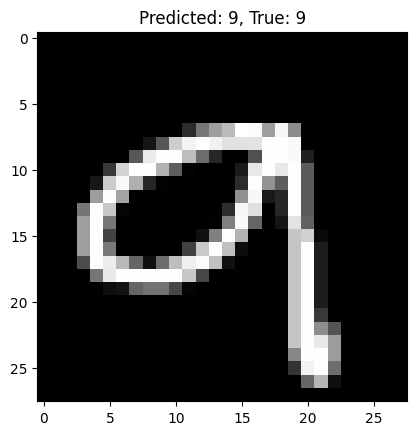

In [ ]:
random_idx = np.random.choice(len(X_test))
random_idx
random_example = X_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_smaple_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted: {y_sample_pred_class}, True: {y_smaple_true}")
plt.imshow(random_example.reshape(28,28), cmap = 'gray')

# Printing the Confusion Matrix as Heat Map

Text(0.5, 1.0, 'Confusion Matrix')

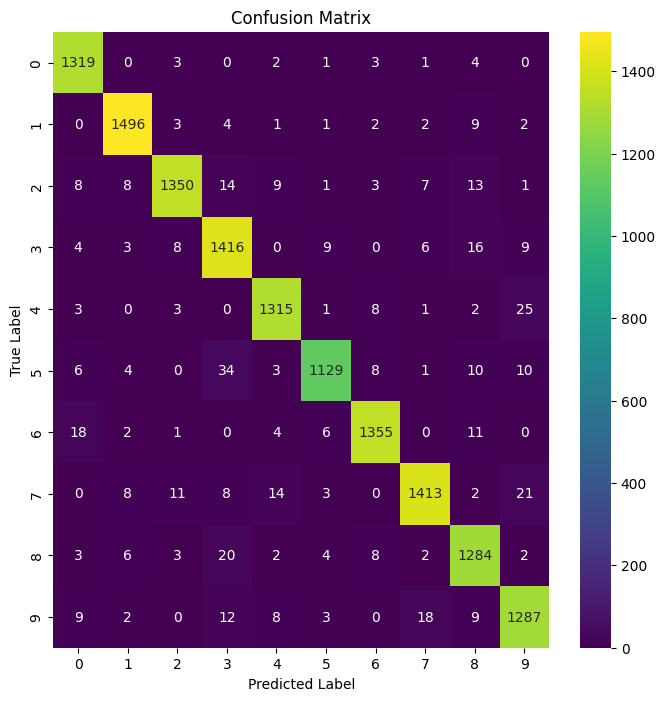

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', ax=ax, cmap='viridis')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Creating a CNN Model

In [ ]:
X_train.shape[0]

28140

In [ ]:
train_images = X_train.reshape(X_train.shape[0], 28, 28, 1)
test_images = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the CNN Model

In [ ]:
cnn_model.fit(train_images, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
440/440 [==============================] - 27s 58ms/step - loss: 0.2940 - accuracy: 0.9108
Epoch 2/5
440/440 [==============================] - 26s 60ms/step - loss: 0.0734 - accuracy: 0.9780
Epoch 3/5
440/440 [==============================] - 25s 56ms/step - loss: 0.0508 - accuracy: 0.9845
Epoch 4/5
440/440 [==============================] - 25s 58ms/step - loss: 0.0395 - accuracy: 0.9875
Epoch 5/5
440/440 [==============================] - 23s 52ms/step - loss: 0.0308 - accuracy: 0.9902


# Evaluating the CNN Model

In [ ]:
cnn_model.evaluate(test_images, y_test)[1]

434/434 [==============================] - 9s 20ms/step - loss: 10.0027 - accuracy: 0.9838


0.9837662577629089

In [ ]:
y_pred = cnn_model.predict(test_images)
y_pred

434/434 [==============================] - 7s 15ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.99999994,
        0.        ],
       [0.        , 0.99999994, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.99999994],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

array([8, 1, 9, ..., 6, 3, 2])

# Predicting for a new single example

In [ ]:
test_images = np.array(test_images)

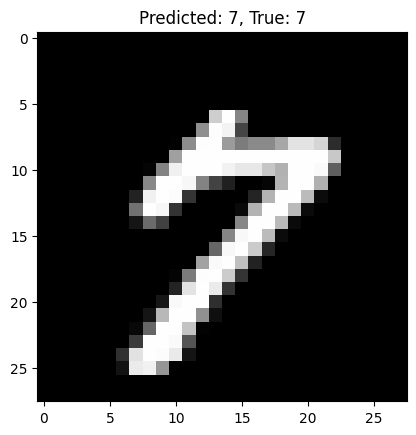

In [ ]:
random_idx = np.random.choice(len(test_images))
random_idx
random_example = test_images[random_idx]
y_true = np.argmax(y_test, axis=1)
y_smaple_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title(f"Predicted: {y_sample_pred_class}, True: {y_smaple_true}")
plt.imshow(random_example.reshape(28,28), cmap = 'gray')

# Printing the Confusion Matrix as Heat Map

Text(0.5, 1.0, 'Confusion Matrix')

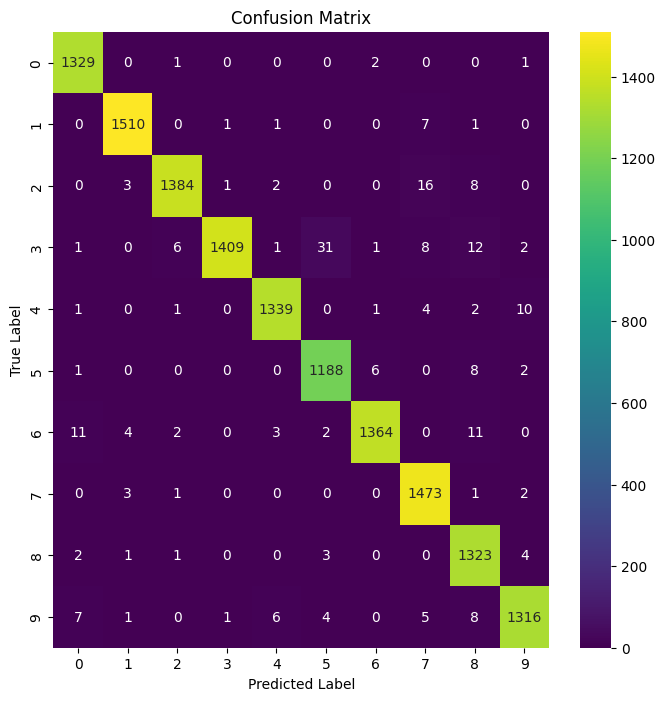

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.heatmap(confusion_matrix(y_true, y_pred_classes), annot=True, fmt='d', ax=ax, cmap='viridis')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')